In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

## אינטגרציה וגזירה נומרית + ODEs
בפיזיקה ומתמטיקה רבות מהבעיות אינן ניתנות לפתרון אנליטי פשוט, ולכן יש צורך להעריך את הפתרונות באופן נומרי באמצעות קירובים חישוביים.

### אינטגרציה נומרית
המטרה היא להעריך שטח מתחת לפונקציה:

$$
I = \int_a^b f(x)\,dx
$$

![Alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Integral_example.svg/330px-Integral_example.svg.png)

- **שיטות מדויקות:**  
  `scipy.integrate.quad` משתמשת באינטגרציה אדפטיבית:  
  1) מתחילים בקטע $[a,b]$ ובודקים אותו עם מעט נקודות. על בסיס אותן נקודות מחשבים שתי הערכות לשטח: אחת גסה ואחת מדויקת יותר (Gauss–Kronrod).  
  2) ההפרש בין שתי ההערכות הוא אומדן השגיאה.  
  3) אם השגיאה קטנה מהסף שנקבע — מקבלים את תרומת הקטע. אם לא — מחלקים את הקטע לשניים ודוגמים יותר באזור הבעייתי.  
  4) חוזרים על התהליך עד שכל התת־קטעים עומדים בדרישת הדיוק (או עד שמגיעים למגבלת החלוקות).

  שיטה זו מתאימה גם לגבולות אינסופיים ($\pm\infty$) ע"י מיפוי לתחום סופי. אם יש נקודות בעייתיות באמצע ניתן לסמן זאת בפונקציה על ידי `points=[...]`.

- **שיטות נומריות פשוטות:**  
  כלל הטרפזים `scipy.integrate.trapezoid`:  
  שיטת הטרפזים היא אחת השיטות הנומריות הפשוטות ביותר לקירוב אינטגרלים מסוימים.  
  במקום לחשב את השטח המדויק מתחת לעקומה, נחלק את הקטע ל־$N$ תתי־קטעים, ובכל תת־קטע נקרב את הפונקציה בקו ישר בין נקודות הקצה. כך מתקבלים **טרפזים** שהשטח שלהם קל לחישוב.


  ![Alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlxd8SDZkdn2zfQZFnd7tds9i3gaWWFYMZYw&s)

  הנוסחה הכללית:  

  $$
  \int_a^b f(x)\,dx \;\approx\; \dfrac{h}{2}\Big[ f(x_0) + 2f(x_1) + 2f(x_2) + \dots + 2f(x_{N-1}) + f(x_N) \Big]
  $$ 

  כאשר $h = \dfrac{b-a}{N}$ הוא רוחב כל תת־קטע, ו־$x_i = a + i h$.  

  `trapezoid(y, x=None, dx=1.0, axis=-1)` מטפלת במרווחים כך:  
    - ללא `x` ובשימוש ב־`dx` סקלרי ⇒ **נחתכים מרווחים שווים** באורך `dx`.  
    - כאשר מספקים **וקטור `x` מונוטוני** התואם לאורך של `y` לאורך הציר `axis` ⇒ **אין דרישה למרווחים שווים**; כל טרפז מחושב לפי ההפרשים המקומיים $\Delta x_i = x_{i+1}-x_i$.
  - הפרמטר `axis` קובע את הציר לאינטגרציה; אם מספקים `x`, אורכו חייב להתאים לאורך של `y` באותו ציר.
  - לרשת **לא-אחידה**, מומלץ להעביר `x` במפורש כדי לא להניח בטעות `dx` קבוע.
  - הנוסחה שעליה הפונקציה נשענת:

  $$
  \int_a^b f(x)\,dx \approx \sum_i \tfrac{1}{2}\,(y_{i+1}+y_i)\,(x_{i+1}-x_i).
  $$
  
  ```{note}
  הספרייה מספקת פונקציה נוספת לחשוב אינטגרל מצטבר בשיטת הטרפזים : `scipy.integrate.cumtrapz` 
  `cumtrapz` מחשבת את האינטגרל המצטבר: עבור קבוצת נקודות $x_0<\dots<x_N$ וקבוצת ערכים $y_i\approx f(x_i)$ מתקבל רצף שטחים  
  $A_k \approx \int_{x_0}^{x_k} f(x)\,dx$ לכל $k$.  

  - בניגוד ל-`numpy.trapz` שמחזירה **ערך יחיד** (האינטגרל הכולל על $[a,b]$), `cumtrapz` מחזירה **מערך** של הערכים המצטברים לכל נקודה.  
  - שיטה זו שימושית כאשר רוצים את האינטגרל עד כל נקודה ולא רק את הסכום הכולל, כלומר לקבל עקומה מצטברת: 
    לכל $x_k$ מתקבל $A_k \approx \int_{x_0}^{x_k} f(x)\,dx$. 
    דוגמאות: להפוך PDF ל־CDF; לחשב מרחק מצטבר מתוך מהירות $v(t)$.
  ```

`````{admonition} מדוע יש מספר שיטות אינטגרציה?
:class: tip
כדי להמחיש, נבחן אינטגרל עם גבול אינסופי:

$$
\int_{0}^{\infty} e^{-x}\,dx = 1.
$$

**עם `quad` (אדפטיבי):**  
- אפשר לכתוב ישירות גבולות אינסופיים (`0, np.inf`).  
- האלגוריתם ממפה לתחום סופי, בוחר נקודות דגימה לפי שגיאה, ומחזיר ערך ואומדן שגיאה.

**עם כלל הטרפזים (`trapz`/`cumtrapz`):**  
- חייבים לעבוד על קטע סופי: בוחרים $L$ ומחשבים על $[0,L]$.  
- מנהלים שתי שגיאות:  
  1) קיטום הזנב $[L,\infty)$ (למשל עבור $e^{-x}$, בחירה $L \approx 10$ נותנת קיטום $\approx e^{-10}$).  
  2) דיסקרטיזציה של הרשת (מגדילים $N$ או מצופפים את $x$).  
- מגדילים את $L$ ומצופפים את הרשת עד שהערך מתייצב בתוך הסף הרצוי.
`````

להלן דוגמת שימוש בפונקציות אינטגרציה של SciPy שממחישה את ההבדל ואת טיב הקירוב:


In [3]:
# %%
# SciPy-only integration demo: quad (improper integral) vs trapezoid (finite interval)
import numpy as np
from scipy import integrate, special

# Target integrand and exact value on [0, ∞)
f = lambda x: np.exp(-x**2)          # Gaussian
I_exact = np.sqrt(np.pi)/2           # integral_0^∞ e^{-x^2} dx

# 1) quad can handle the infinite limit directly
I_quad, err_quad = integrate.quad(f, 0, np.inf)

print("Exact               =", I_exact)
print("quad (0..∞)         =", I_quad, "   | est. abs error ~", err_quad)
print("abs error (quad)    =", abs(I_quad - I_exact))
print("-"*60)

# 2) trapezoid must approximate [0, ∞) by [0, L] and a finite grid
Ls = [2, 3, 4, 6]         # cutoff values
Ns = [200, 1000, 5000]    # number of grid points

for L in Ls:
    for N in Ns:
        xs = np.linspace(0, L, N)                 # finite grid
        I_trap = integrate.trapezoid(f(xs), xs)   # SciPy's trapezoid (not NumPy)
        # Add tail estimate via complementary error function: ∫_L^∞ e^{-x^2} dx = (√π/2) erfc(L)
        tail = (np.sqrt(np.pi)/2) * special.erfc(L)
        I_trap_tail = I_trap + tail               # corrected trapezoid with tail
        print(f"L={L:<2}  N={N:<5} | trap={I_trap:.8f}  + tail={tail:.3e}  -> trap+tail={I_trap_tail:.8f}  | abs err={abs(I_trap_tail - I_exact):.2e}")
    print("-"*60)


Exact               = 0.8862269254527579
quad (0..∞)         = 0.8862269254527579    | est. abs error ~ 7.10131839047246e-09
abs error (quad)    = 0.0
------------------------------------------------------------
L=2   N=200   | trap=0.88208077  + tail=4.146e-03  -> trap+tail=0.88622631  | abs err=6.17e-07
L=2   N=1000  | trap=0.88208137  + tail=4.146e-03  -> trap+tail=0.88622690  | abs err=2.45e-08
L=2   N=5000  | trap=0.88208139  + tail=4.146e-03  -> trap+tail=0.88622692  | abs err=9.77e-10
------------------------------------------------------------
L=3   N=200   | trap=0.88620733  + tail=1.958e-05  -> trap+tail=0.88622691  | abs err=1.40e-08
L=3   N=1000  | trap=0.88620735  + tail=1.958e-05  -> trap+tail=0.88622692  | abs err=5.56e-10
L=3   N=5000  | trap=0.88620735  + tail=1.958e-05  -> trap+tail=0.88622693  | abs err=2.22e-11
------------------------------------------------------------
L=4   N=200   | trap=0.88622691  + tail=1.366e-08  -> trap+tail=0.88622693  | abs err=3.03e-11
L

#### ניתוח תוצאות

- `quad` נותנת תוצאה מדויקת מאוד ישירות על $[0,\infty)$, עם הערכת שגיאה פנימית.  
- `trapezoid` לבדו על $[0,L]$ יחמיץ את הזנב ($x > L$). שיפור פשוט הוא להוסיף תיקון זנב אנליטי:  

  $$
  \int_L^\infty e^{-x^2}\,dx \;=\; \tfrac{\sqrt{\pi}}{2}\,\mathrm{erfc}(L),
  $$

  ואז השגיאה תלויה בעיקר בצפיפות הרשת ובבחירת $L$.  
- הגדלת $L$ ו־$N$ משפרת את הדיוק, אך העלות החישובית גדלה — זו בדיוק התועלת של `quad` בשילוב גבולות אינסופיים.

`````{admonition} באיזו שיטה נבחר?
:class :tip
**נבחר ב־`quad` כאשר:**
- יש לנו פונקציה \(f(x)\) שניתן לקרוא לה (לא רק דגימות).
- נדרש ערך בודד עם אומדן שגיאה ודיוק נשלט (`epsabs/epsrel`).
- יש גבולות אינסופיים  ($\pm\infty$) או נקודות בעייתיות ידועות (`points=[...]`).

**נבחר בכלל הטרפזים (`trapz`/`cumtrapz`) כאשר:**
- יש לנו דגימות \(x,y\) (מדידה/סימולציה על רשת).
- רוצים עקומה מצטברת בקלות (`cumtrapz`) או הרבה אינטגרלים על אותם נתונים.
- הנתונים רועשים וצריך שיטה פשוטה ויציבה.
`````

### נגזרות ומשוואות דיפרנציאליות רגילות (ODEs)
במקרים רבים אנו מתעניינים בהתפתחות בזמן של מערכת, המתוארת על ידי ODE:

$$
\frac{d\mathbf{y}}{dt} = f(t,\mathbf{y}), \quad \mathbf{y}(t_0) = \mathbf{y}_0
$$

כלומר, הנגזרת של המשתנה $\mathbf{y}$ תלויה בזמן ובערכו הנוכחי.  
כדי לפתור, משתמשים בפונקציה `scipy.integrate.solve_ivp`, שמבצעת אינטגרציה נומרית לאורך הזמן.

### דוגמה: מתנד הרמוני
המשוואה של מתנד הרמוני פשוט היא:

$$
\ddot{x} + \omega^2 x = 0
$$

שניתן לרשום כמערכת של שתי משוואות מסדר ראשון:

$$
\begin{aligned}
\dot{x} &= v \\
\dot{v} &= -\omega^2 x
\end{aligned}
$$

כך אפשר לייצג את המצב כוקטור $\mathbf{y} = [x,v]$ ולפתור נומרית באמצעות `solve_ivp`.

![Alt text](https://upload.wikimedia.org/wikipedia/commons/7/74/Simple_harmonic_motion_animation.gif)

נפתור נומרית את משוואת המתנד ההרמוני הפשוט

$$
\ddot{x} + \omega^2 x = 0,
$$

על ידי פירוקה למערכת מסדר ראשון:

$$
\dot{x}=v,\qquad \dot{v}=-\omega^2 x.
$$

נשתמש ב־`scipy.integrate.solve_ivp` כדי לבצע אינטגרציה בזמן, נשווה לפתרון האנליטי

$$ 
x(t)=A\cos(\omega t)+B\sin(\omega t)
$$

(בעת אתחול $x(0)=1,\ v(0)=0$ נקבל $x(t)=\cos(\omega t)$),
ונבדוק שימור אנרגיה:

$$
E(t)=\tfrac{1}{2}\,m v(t)^2+\tfrac{1}{2}\,k x(t)^2
=\tfrac{1}{2}\,v(t)^2+\tfrac{1}{2}\,\omega^2 x(t)^2
$$

(עבור $m=1,\ k=\omega^2$). נציג גם דיוק (שגיאת עקבה) ודיון קצר על פרמטרי הדיוק

ראשית נייבא ספריות ונגדיר קבועים:
- $\omega$ מגדיר את תדר המתנד 
- $t$ את תחום הזמן לפתרון  
- תנאי ההתחלה $\mathbf{y}(0)=[x(0),v(0)]=[1,0]$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

w = 2*np.pi            # natural frequency [rad/s]
t_span = (0.0, 2.0)    # simulation window [s]
y0 = [1.0, 0.0]        # initial state: x(0)=1, v(0)=0

נגדיר את הפונקציה $f(t,\mathbf{y})$ כך ש־$\mathbf{y}=[x,v]$ ו־$\dot{\mathbf{y}}=[v,\,-\omega^2 x]$.  זהו הייצוג הסטנדרטי ל־`solve_ivp`.


In [5]:
def sho(t, y):
    # y = [x, v]
    x, v = y
    return [v, -w**2 * x]


נפעיל את `solve_ivp` עם סבילות יחסית/מוחלטת ($rtol, atol$) לקבלת פתרון מדויק וחלק. `dense_output=True` מאפשר להעריך את $\mathbf{y}(t)$ בכל $t$ מבוקש דרך `sol.sol(t)`.

נגדיר רשת זמן אחידה, ונחלץ את $x(t)$ ו־$v(t)$ הנומריים.

```{note}
ב־`scipy.integrate.solve_ivp` אפשר לבחור את שיטת האינטגרציה דרך הפרמטר `method`.

- **`RK45`** היא ברירת המחדל:  
  מדובר באלגוריתם **Runge–Kutta מסדר 5** עם בקרה פנימית על השגיאה בעזרת אומדן מסדר 4.  
  זהו בעצם האלגוריתם של **Dormand–Prince (1980)** — גרסה יעילה במיוחד של Runge–Kutta.

- **מה זה נותן בפועל?**  
  - צעד בכל אינטגרציה מחשב גם הערכת מסדר 5 וגם הערכת מסדר 4.  
  - ההפרש ביניהן נותן אומדן שגיאה, שבעזרתו הפותר מתאים את גודל הצעד הבא (adaptive step size).  
  - כך מתקבל איזון טוב בין דיוק למהירות.

- **שימוש נפוץ:**  
  מתאים לרוב הבעיות הלא־קשיחות (non-stiff ODEs), ולכן משמש כשיטה ברירת מחדל ב־SciPy.
```


In [6]:
rtol = 1e-9
atol = 1e-12

sol = integrate.solve_ivp(
    sho, t_span, y0,
    method="RK45",        # Dormand–Prince explicit RK
    dense_output=True,    # enables sol.sol(t) evaluation
    rtol=rtol, atol=atol,
    max_step=0.01         # optional: finer dense output
)

t = np.linspace(*t_span, 800)
xy = sol.sol(t)          # evaluate dense solution
x_num = xy[0]
v_num = xy[1]


עבור תנאי ההתחלה שנבחרו מתקבל פתרון אנליטי $x(t)=\cos(\omega t)$, $v(t)=-\omega\sin(\omega t)$.  
נחשב את שגיאת המיקום $x_{\text{num}}-x_{\text{ana}}$ לאורך הזמן לבדיקת הדיוק.


In [7]:
x_ana = np.cos(w*t)
v_ana = -w*np.sin(w*t)
err_x = x_num - x_ana    


נחשב את האנרגיה $E(t)=\tfrac{1}{2}v^2+\tfrac{1}{2}\omega^2 x^2$ (עם $m=1,\ k=\omega^2$).  
נבדוק **סטיית אנרגיה יחסית** $(E-E_0)/E_0$ כדי לוודא שהפתרון יציב ונאמן לדינמיקה השמרנית.


In [8]:
E = 0.5*v_num**2 + 0.5*(w**2)*x_num**2   # m=1, k=ω^2
E0 = E[0]
rel_energy_drift = (E - E0)/E0


ניצור 4 תתי־תרשימים:  
  1) $x(t)$ נומרי מול אנליטי — לבדיקת חפיפה ודיוק.  
  2) גרף פאזה $v$ מול $x$ — מציג מסלול אליפטי אופייני למתנד הרמוני.  
  3) אנרגיה $E(t)$ וקו $E(0)$ — לבדיקת שימור אנרגיה נומרית.  
  4) שגיאת מיקום — מציג את גודל ההפרש בין נומרי לאנליטי לאורך הזמן.

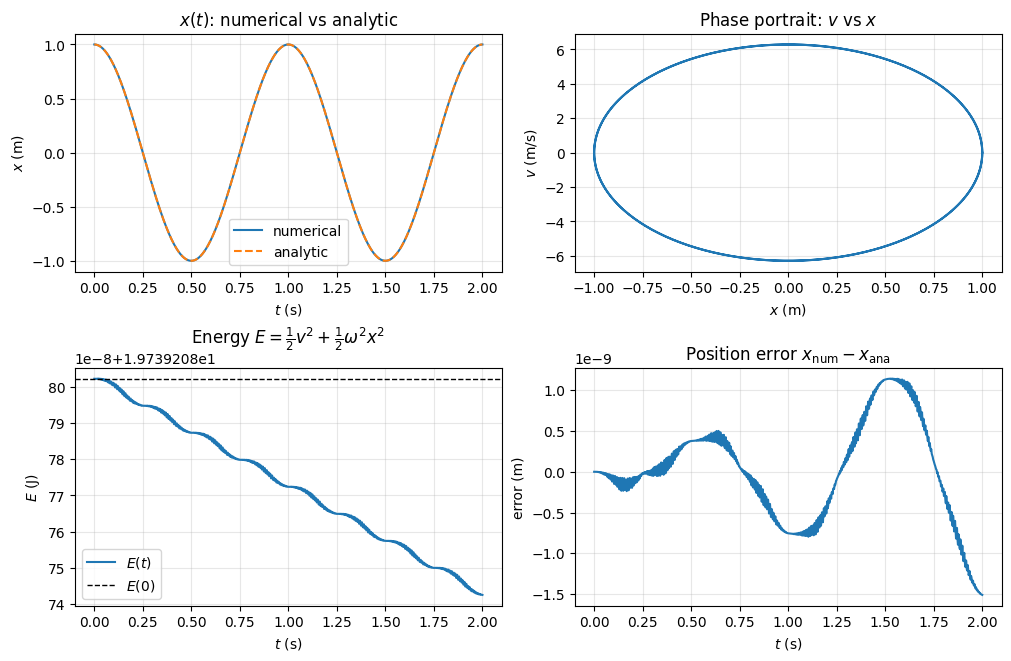

In [9]:

fig, axs = plt.subplots(2, 2, figsize=(10, 6.5), constrained_layout=True)

# (1) x(t): numerical vs analytical
axs[0,0].plot(t, x_num, label="numerical")
axs[0,0].plot(t, x_ana, "--", label="analytic")
axs[0,0].set_title(r"$x(t)$: numerical vs analytic")
axs[0,0].set_xlabel(r"$t$ (s)"); axs[0,0].set_ylabel(r"$x$ (m)")
axs[0,0].legend(); axs[0,0].grid(True, alpha=0.3)

# (2) phase portrait v(x)
axs[0,1].plot(x_num, v_num)
axs[0,1].set_title(r"Phase portrait: $v$ vs $x$")
axs[0,1].set_xlabel(r"$x$ (m)"); axs[0,1].set_ylabel(r"$v$ (m/s)")
axs[0,1].grid(True, alpha=0.3)

# (3) E(t)
axs[1,0].plot(t, E, label=r"$E(t)$")
axs[1,0].axhline(E0, color="k", ls="--", lw=1, label=r"$E(0)$")
axs[1,0].set_title(r"Energy $E = \frac{1}{2} v^2 + \frac{1}{2} \omega^2 x^2$")
axs[1,0].set_xlabel(r"$t$ (s)"); axs[1,0].set_ylabel(r"$E$ (J)")
axs[1,0].legend(); axs[1,0].grid(True, alpha=0.3)

# (4) Position error
axs[1,1].plot(t, err_x)
axs[1,1].set_title(r"Position error $x_{\rm num}-x_{\rm ana}$")
axs[1,1].set_xlabel(r"$t$ (s)"); axs[1,1].set_ylabel(r"error (m)")
axs[1,1].grid(True, alpha=0.3)

plt.show()


`````{admonition} מה רואים בתוצאות?
:class :tip

- **השוואה אנליטי–נומרי:** העקומות של $x(t)$ כמעט חופפות (הפרש קטן מאוד). זה מצביע על דיוק גבוה של `solve_ivp` בהגדרות $rtol, atol$ שנבחרו.  
- **גרף פאזה (Phase portrait):** הגרף של $v$ מול $x$ הוא אליפסה (למעשה מעגל בסקלות מתאימות), כצפוי למתנד הרמוני שבו האנרגיה מחולקת בין תנועה (קינטית) וקפיץ (פוטנציאלית).  
- **אנרגיה:** $E(t)=\tfrac{1}{2}v^2+\tfrac{1}{2}\omega^2x^2$ נשמרת כמעט קבועה (סטיות זעירות מקורן בשגיאות עיגול/אינטגרציה).  
- **שגיאת מיקום:** ההפרש $x_{\rm num}-x_{\rm ana}$ זעיר לאורך כל התחום (שימו לב לסקאלה בצירה הy). אם מקשיחים את הדרישות (למשל מפחיתים $rtol, atol$ עוד), ניתן להקטין את השגיאה על חשבון זמן ריצה.
`````

נדפיס נתוני ביצוע: זמן סופי, מספר הצעדים שננקטו, שגיאת מיקום מקסימלית וסטיית אנרגיה יחסית מירבית — סיכום מהיר לאיכות הפתרון.

In [10]:
print(f"Final time reached: t = {sol.t[-1]:.3f} s, steps taken: {len(sol.t)}")
print(f"Max |x error| over grid: {np.max(np.abs(err_x)):.2e}")
print(f"Relative energy drift (max): {np.max(np.abs(rel_energy_drift)):.2e}")

Final time reached: t = 2.000 s, steps taken: 256
Max |x error| over grid: 1.51e-09
Relative energy drift (max): 3.02e-09


`````{admonition} כללי אצבע
:class :tip

- אפשר לשנות שיטת אינטגרציה דרך `method` (למשל `"DOP853"`, `"Radau"` לבעיות קשיחות).  
- הגדלת הדיוק (`rtol`, `atol`) או הקטנת `max_step` תקטין שגיאות – אך תגדיל את מספר הצעדים וזמן החישוב.  
- עבור בדיקות אימות, השוואה לפתרון אנליטי (כאשר קיים) ולמעקב אחר אנרגיה הם כלים יעילים לגילוי בעיות בדיוק/יציבות.
`````

In [11]:
import json
from jupyterquiz import display_quiz
from IPython.display import Javascript, display

quiz_json = r'''
[
  {
    "question": "איזו פונקציה מתאימה לחישוב אינטגרל עם גבול אינסופי מהצורה $\\int_0^{\\infty} e^{-x^2}\\,dx$?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>numpy.trapz</code>",
        "correct": false,
        "feedback": "לא נכון — trapz פועל על קטע סופי עם רשת נקודות נתונה."
      },
      {
        "answer": "<code>integrate.quad</code>",
        "correct": true,
        "feedback": "נכון! integrate.quad יודע לטפל גם באינטגרלים עם גבול אינסופי."
      },
      {
        "answer": "<code>integrate.solve_ivp</code>",
        "correct": false,
        "feedback": "לא נכון — solve_ivp מיועד למשוואות דיפרנציאליות, לא לאינטגרלים."
      },
      {
        "answer": "<code>integrate.cumtrapz</code>",
        "correct": false,
        "feedback": "לא נכון — cumtrapz נותן אינטגרל מצטבר על רשת בדידה בקטע סופי."
      }
    ]
  },
  {
    "question": "בכתיבת משוואת מתנד הרמוני $\\ddot{x} + \\omega^2 x = 0$, מהי המערכת המסדר הראשון המתאימה לפתרון ב-<code>solve_ivp</code>?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "$\\dot{x} = v,\\ \\ \\dot{v} = -\\omega^2 x$",
        "correct": true,
        "feedback": "נכון! מגדירים מצב $\\mathbf{y}=[x,v]$ כך ש-$\\dot{\\mathbf{y}}=[v,-\\omega^2 x]$."
      },
      {
        "answer": "$\\dot{x} = -\\omega^2 x,\\ \\ \\dot{v} = v$",
        "correct": false,
        "feedback": "לא נכון — זהו סידור משוואות שאינו מתאים למתנד ההרמוני."
      },
      {
        "answer": "$\\dot{x} = x,\\ \\ \\dot{v} = v$",
        "correct": false,
        "feedback": "לא נכון — אלו אינן משוואות המתארות מתנד הרמוני."
      },
      {
        "answer": "$\\dot{x} = -v,\\ \\ \\dot{v} = \\omega^2 x$",
        "correct": false,
        "feedback": "לא נכון — סימני הנגזרות התהפכו."
      }
    ]
  },
  {
    "question": "איזו כמות נשמרת במתנד הרמוני אידיאלי ויכולה לשמש לבדיקת דיוק נומרי?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "התנע $p = m v$",
        "correct": false,
        "feedback": "לא מדויק — התנע לבדו אינו קבוע; הוא מתחלף בהתאם למיקום והמהירות."
      },
      {
        "answer": "האנרגיה הכוללת $E = \\tfrac{1}{2}v^2 + \\tfrac{1}{2}\\,\\omega^2 x^2$ (עבור $m=1$)",
        "correct": true,
        "feedback": "נכון! במתנד הרמוני אידיאלי האנרגיה נשמרת, וסטייה קטנה מצביעה על פתרון נומרי מדויק."
      },
      {
        "answer": "המיקום $x(t)$",
        "correct": false,
        "feedback": "לא נכון — המיקום משתנה מחזורית בזמן."
      },
      {
        "answer": "המהירות $v(t)$",
        "correct": false,
        "feedback": "לא נכון — גם המהירות משתנה בזמן."
      }
    ]
  }
]
'''

myquiz = json.loads(quiz_json)
display_quiz(myquiz)

display(Javascript("""
(() => {
  if (window.MathJax) {
    if (MathJax.typesetPromise) { MathJax.typesetPromise(); }
    else if (MathJax.Hub && MathJax.Hub.Queue) { MathJax.Hub.Queue(['Typeset', MathJax.Hub]); }
  }
})();
"""))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>